In [1]:
import pandas as pd

In [68]:
df_full = pd.read_csv('/Users/ivansirokov/Documents/diploma/data/audio_all/efinal_all.csv')

In [131]:
df_full.drop(df_full.columns[0], axis=1, inplace=True)

In [69]:
df_full

,ID,NW,NP,TLP,ALP,NS,AT,ER,AR,F0semitoneFrom27.5Hz_sma3nz_amean,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,kar10,99,127,10.929524,0.086059,183,48.670023,3.070493,3.760015,32.970860,...,-0.013152,-0.007350,0.423730,3.826788,3.024193,0.206167,0.225002,0.121908,0.141954,-21.237200
1,Kar100,57,90,19.005533,0.211173,111,40.794014,1.856201,2.720987,38.017740,...,-0.053047,-0.003813,0.132008,2.174640,1.523522,0.356703,0.268905,0.282000,0.466136,-21.489687
2,kar101,78,108,17.728526,0.164153,138,42.031020,2.309254,3.283289,38.044945,...,-0.046029,-0.002446,0.215577,3.046535,2.094504,0.243520,0.223583,0.237589,0.375284,-19.974138
3,Kar102,44,97,17.857506,0.184098,113,41.902041,1.890911,2.696766,35.063576,...,-0.049607,-0.006242,0.164589,2.410445,1.859919,0.289009,0.259035,0.250500,0.325033,-22.237415
4,kar103,50,98,23.395510,0.238730,108,36.364036,1.807243,2.969967,35.758774,...,-0.047888,-0.006734,0.175633,2.460663,1.944351,0.230690,0.169765,0.281481,0.422122,-20.885715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,kar77,11,42,27.398503,0.652345,47,32.401043,0.785959,1.450571,34.944870,...,-0.030083,-0.007545,0.119837,1.187688,1.272392,0.395789,0.553314,0.378514,0.388242,-21.550360
642,kar92,11,36,40.710522,1.130848,47,19.009025,0.787012,2.472510,35.464397,...,-0.057426,0.000849,0.084653,1.122278,0.821596,0.314694,0.297185,0.918723,1.344919,-24.466974
643,nnr36,11,50,26.685805,0.533716,77,33.343039,1.282717,2.309328,39.225560,...,-0.052883,-0.004549,0.130079,1.833028,1.351126,0.377778,0.449771,0.367333,0.618675,-19.495056
644,russir40,8,44,33.277415,0.756305,47,26.789025,0.782467,1.754450,30.080677,...,-0.060866,-0.016622,0.149526,0.915903,4.150692,0.131325,0.197576,0.102617,0.090107,-21.441685


In [4]:
df_full_colnames = df_full.columns.values.tolist()

In [70]:
from scipy.stats import pearsonr
def pearsonr_pval (x, y):
    return pearsonr (x, y)[1]
corr = df_full.corr('spearman') #method = pearsonr_pval
corr.style.background_gradient(cmap='RdYlGn')


In [62]:
stats = pd.DataFrame()

In [63]:
stats["p-value"] = corr['NW']

In [66]:
stats["Spearman's ρ"] = corr['NW']

In [67]:
stats.to_csv('/Users/ivansirokov/Documents/diploma/data/audio_all/Zoo_stats.csv')

In [181]:
import statsmodels.api as sm

In [20]:
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
import tensorflow as tf

In [183]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [630]:
X = df_full[['NP','TLP','ALP','NS','AT','ER','AR','loudness_sma3_stddevNorm','loudness_sma3_meanRisingSlope','loudness_sma3_meanFallingSlope','spectralFlux_sma3_amean','loudnessPeaksPerSec']]
y = df_full['NW']

In [539]:
X = df_full[['NP','TLP','ALP','NS','AT','ER','AR','loudnessPeaksPerSec','loudness_sma3_meanFallingSlope']]
y = df_full['NW']

In [532]:
X = df_full[['NP','NS','ER','loudnessPeaksPerSec']]
y = df_full['NW']

In [631]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
reg = linear_model.LinearRegression() 
reg.fit(X_train, y_train)

LinearRegression()

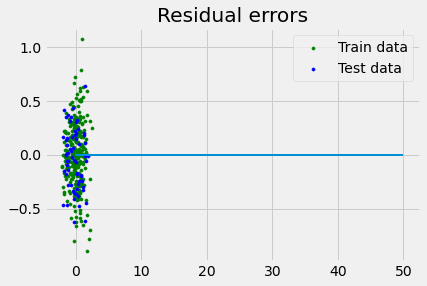

In [22]:
# setting plot style 
plt.style.use('fivethirtyeight') 
  
# plotting residual errors in training data 
plt.scatter(reg.predict(X_train), 
            reg.predict(X_train) - y_train, 
            color="green", s=10, 
            label='Train data') 
  
# plotting residual errors in test data 
plt.scatter(reg.predict(X_test), 
            reg.predict(X_test) - y_test, 
            color="blue", s=10, 
            label='Test data') 
  
# plotting line for zero residual error 
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2) 
  
# plotting legend 
plt.legend(loc='upper right') 
  
# plot title 
plt.title("Residual errors") 
  
# method call for showing the plot 
plt.show() 

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
import warnings 
  
from sklearn.preprocessing import LabelEncoder 
from sklearn.impute import KNNImputer 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import f1_score 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score 
  
warnings.filterwarnings('ignore') 

In [392]:
X = df_full[['NP','TLP','ALP','NS','AT','ER','AR','loudness_sma3_stddevNorm','loudness_sma3_meanRisingSlope','loudness_sma3_meanFallingSlope','spectralFlux_sma3_amean','loudnessPeaksPerSec']].values
y = df_full['NW'].values

In [24]:
from sklearn.linear_model import LinearRegression 
lin_reg=LinearRegression() 
lin_reg.fit(X_train,y_train)

LinearRegression()

In [245]:
preds = lin_reg.predict(X_test)

In [246]:
print('Variance score: {}'.format(reg.score(X_test, preds)))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ALP
- AT
- ER
- NP
- NS
- ...
Feature names seen at fit time, yet now missing:
- SR
- articulation_time
- len_p
- num_p
- num_syllables
- ...


In [250]:
# Importing the evaluation metrics 
from sklearn.metrics import r2_score
# R-score --> evaluation metrics
print('R score is :', r2_score(y_test, predictions))

R score is : -1625.1271128959154


In [223]:
preds_house = model_house.predict(X_test)

3/3 [==============================] - 0s 2ms/step


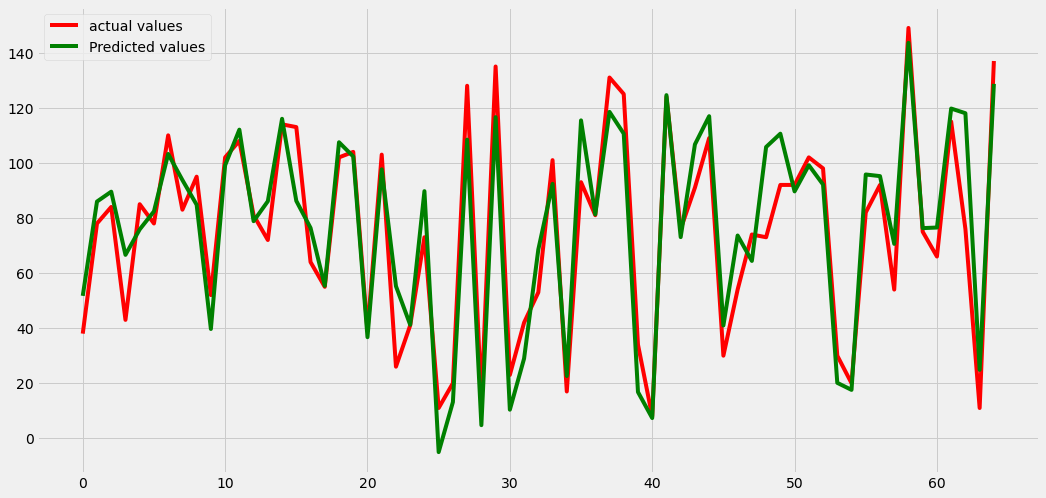

In [63]:
# fitting the size of the plot
plt.figure(figsize=(16, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual values", c='r')
plt.plot([i for i in range(len(y_test))],preds_house, label="Predicted values", c='g')
# showing the plotting
plt.legend()
plt.show()

In [543]:
# Sequential model
tf.random.set_seed(42)
# building the model with hidden layer
model_house = tf.keras.Sequential([tf.keras.layers.InputLayer(
    input_shape=9,),
  tf.keras.layers.Dense(15, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(15, activation = tf.keras.activations.relu),
                                   
  tf.keras.layers.Dense(1)
])
# compiling the model
model_house.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
# Training the model
model_house.fit(X_train, y_train, epochs=1000, verbose=0)

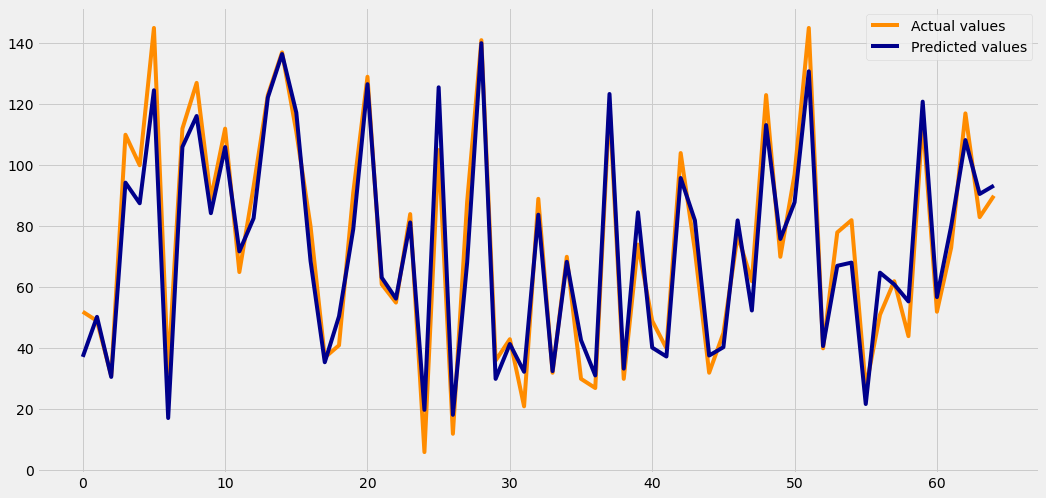

In [55]:
# fitting the size of the plot
plt.figure(figsize=(16, 8))
# plotting the graphs
plt.plot([i for i in range(len(y_test))],TargetVarScalerFit.inverse_transform(y_test.reshape(-1, 1)), label="Actual values", color='darkorange')
plt.plot([i for i in range(len(y_test))],TargetVarScalerFit.inverse_transform(preds.reshape(-1, 1)), label="Predicted values", c='darkblue')
# showing the plotting
plt.legend()
plt.savefig('/Users/ivansirokov/Desktop/Robust.png')
plt.show()

X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y.reshape(-1, 1))

In [46]:
# Robust model
X_train = sm.add_constant(X_train)
robust_model = sm.RLM(y_train, X_train, M=sm.robust.norms.RamsayE())
robust_results = robust_model.fit()
preds = robust_results.predict(sm.add_constant(X_test))

In [51]:
robust_model = sm.RLM(y_train, X_train, M=sm.robust.norms.RamsayE())

In [52]:
robust_results = robust_model.fit()

In [53]:
preds = robust_results.predict(sm.add_constant(X_test))

In [45]:
import statsmodels.api as sm

In [39]:
#RandomForest model
regressor = RandomForestRegressor(n_estimators=15, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=15, oob_score=True, random_state=0)

In [40]:
preds = regressor.predict(X_test)

In [32]:
# CatBoost Regression Model
from catboost import CatBoostRegressor

# Initialize the CatBoostRegressor with RMSE as the loss function
model = CatBoostRegressor(learning_rate=0.01, n_estimators=450, depth=5)

# Fit the model on the training data with verbose logging every 100 iterations
model.fit(X_train, y_train, verbose=100)


0:	learn: 0.9600363	total: 60.8ms	remaining: 27.3s
100:	learn: 0.5315026	total: 134ms	remaining: 462ms
200:	learn: 0.3674961	total: 218ms	remaining: 271ms
300:	learn: 0.3053725	total: 312ms	remaining: 154ms
400:	learn: 0.2760261	total: 412ms	remaining: 50.4ms
449:	learn: 0.2649862	total: 454ms	remaining: 0us


In [73]:
print('r2 = ', sklearn.metrics.r2_score(y_test, preds))

print('Variance = ', sklearn.metrics.explained_variance_score(y_test, preds))

print('MAPE = ', sklearn.metrics.mean_absolute_percentage_error(TargetVarScalerFit.inverse_transform(y_test.reshape(-1, 1)), TargetVarScalerFit.inverse_transform(preds.reshape(-1, 1))))

print('MAE = ', sklearn.metrics.mean_absolute_error(TargetVarScalerFit.inverse_transform(y_test.reshape(-1, 1)), TargetVarScalerFit.inverse_transform(preds.reshape(-1, 1))))

print('RMSE = ', np.sqrt(mse(TargetVarScalerFit.inverse_transform(y_test.reshape(-1, 1)), TargetVarScalerFit.inverse_transform(preds.reshape(-1, 1)))))

r2 =  0.8965659601993887
Variance =  0.8986559571623137
MAPE =  0.1303156228149271
MAE =  8.913152063809909
RMSE =  11.483447292936274


In [13]:
import sklearn
import numpy as np

In [512]:
SVR model
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVR 
  
# generate synthetic data 

  
# add some noise to the data 

  
# create an SVR model with a linear kernel 
svr = SVR(kernel='poly') 
  
# train the model on the data 
svr.fit(X_train, y_train) 
  
# make predictions on the data 
preds = svr.predict(X_test) 
  


In [71]:
# Sequential model
TargetVariable=df_full['NW']
Predictors=df_full[['NP','TLP','ALP','NS','AT','ER','AR','loudness_sma3_stddevNorm','loudness_sma3_meanRisingSlope','loudness_sma3_meanFallingSlope','spectralFlux_sma3_amean','loudnessPeaksPerSec']]


X = df_full[['NP','TLP','ALP','NS','AT','ER','AR','loudness_sma3_stddevNorm','loudness_sma3_meanRisingSlope','loudness_sma3_meanFallingSlope','spectralFlux_sma3_amean','loudnessPeaksPerSec']].values
y = df_full['NW'].values



 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y.reshape(-1, 1))
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y.reshape(-1, 1))
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(516, 12)
(516, 1)
(130, 12)
(130, 1)


In [72]:

# importing the libraries, sequential model
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=64, input_dim=12, kernel_initializer='normal', activation='sigmoid'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=32, kernel_initializer='normal', activation='sigmoid'))

model.add(Dense(units=16, kernel_initializer='normal', activation='sigmoid'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 45, epochs = 1000, verbose=1)

preds = model.predict(X_test)

Epoch 1/1000
12/12 [==============================] - 1s 3ms/step - loss: 0.9755
Epoch 2/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.9699
Epoch 3/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.9664
Epoch 4/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.9592
Epoch 5/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.9411
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.9027
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.8355
Epoch 8/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.7331
Epoch 9/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6094
Epoch 10/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4809
Epoch 11/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.3796
Epoch 12/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.3067
Epoch 13/1000
12/12 [====

In [564]:
# 
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=5, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model
 
###########################################
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
 
# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }
 
# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)
 
###########################################
from sklearn.metrics import make_scorer
 
# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
 
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
 
#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, 
                         param_grid=Parameter_Trials, 
                         scoring=custom_Scoring, 
                         cv=5)
 
#########################################
# Measuring how much time it took to find the best params
import time
StartTime=time.time()
 
# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)
 
EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')
 
print('### Printing Best parameters ###')
grid_search.best_params_

Epoch 1/10
26/26 [==============================] - 0s 2ms/step - loss: 0.7638
Epoch 2/10
26/26 [==============================] - 0s 2ms/step - loss: 0.7260
Epoch 3/10
26/26 [==============================] - 0s 2ms/step - loss: 0.6477
Epoch 4/10
26/26 [==============================] - 0s 2ms/step - loss: 0.5128
Epoch 5/10
26/26 [==============================] - 0s 2ms/step - loss: 0.3383
Epoch 6/10
26/26 [==============================] - 0s 2ms/step - loss: 0.2201
Epoch 7/10
26/26 [==============================] - 0s 2ms/step - loss: 0.1870
Epoch 8/10
26/26 [==============================] - 0s 2ms/step - loss: 0.1790
Epoch 9/10
26/26 [==============================] - 0s 2ms/step - loss: 0.1722
Epoch 10/10
26/26 [==============================] - 0s 2ms/step - loss: 0.1662
###################################################################### Accuracy: -0.6936360210396373
Epoch 1/10
26/26 [==============================] - 1s 2ms/step - loss: 1.1351
Epoch 2/10
26/26 [===========

{'Optimizer_trial': 'adam', 'batch_size': 20, 'epochs': 20}